In [2]:
import sys
sys.path.append('../')

import numpy as np
import torch
from sklearn import svm
from sklearn.linear_model import Perceptron

import matplotlib.pyplot as plt
import matplotlib 
import pandas as pd
import seaborn as sbn

from contextlib import redirect_stdout
import ast

import FullRankRNN as rnn
import Reinforce as rln

In [2]:
critic_network = rnn.FullRankRNN(input_size=131, hidden_size=128, output_size=1,
                                 noise_std=0, alpha=0.2, rho=0.8, beta=1,
                                 train_wi=True, train_wo=True, train_wrec=True)

critic_network.load_state_dict(torch.load("models/RL_critic_network_good.pt", map_location=torch.device('cpu')))

<All keys matched successfully>

In [3]:
wo_critic = critic_network.wo.data

In [2]:
#print(wo_critic.shape, "\n", wo_critic)

In [4]:
wo_perceptron = pd.read_csv('perceptron_wo.csv')

In [5]:
wo_perceptron = wo_perceptron.to_numpy()

In [3]:
#print(wo_perceptron.shape, "\n", wo_perceptron)

Text(0.5, 1.0, 'wo critic vs perceptron')

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


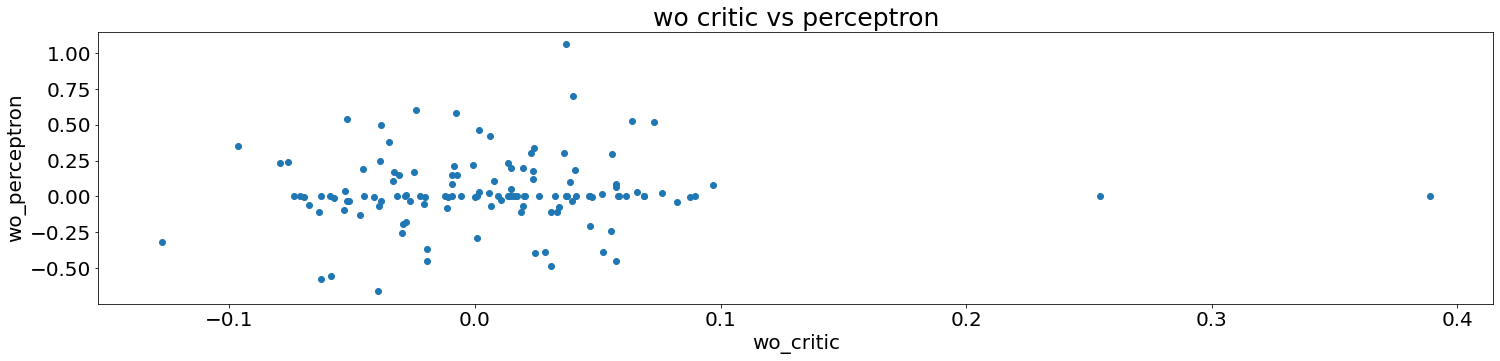

In [6]:
plt.figure(figsize=(25,5))
plt.scatter(wo_critic, wo_perceptron/4000)

plt.xlabel("wo_critic", size=20)
plt.ylabel("wo_perceptron", size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.title("wo critic vs perceptron", size=25)

In [3]:
reinforce = rln.REINFORCE(name_load_actor="models/RL_actor_network_good.pt",
                          name_load_critic="models/RL_critic_network_good.pt")

In [4]:
iterations = 500 

observations, rewards, actions,\
log_action_probs, entropies, values,\
trial_begins, errors, frates, time_av_values_col, \
final_actions, global_values = reinforce.experience(iterations, clsf_on_actor=False)

iteration 100
iteration 200
iteration 300
iteration 400
iteration 500


Text(0.5, 1.0, "critic output vs overall trials' values")

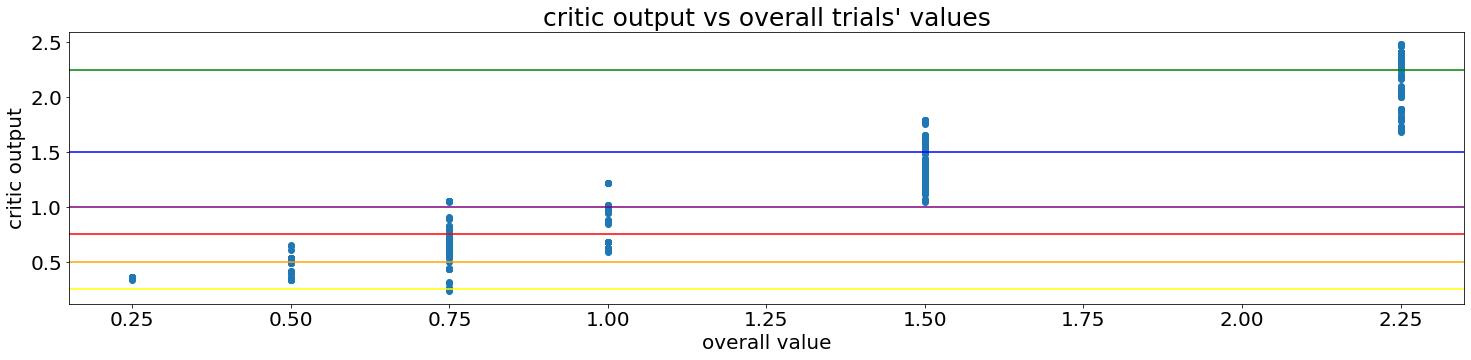

In [6]:
plt.figure(figsize=(25,5))
plt.plot(global_values, time_av_values_col, "o")
plt.axhline(0.25, color="yellow")
plt.axhline(0.5, color="orange")
plt.axhline(0.75, color="red")
plt.axhline(1, color="purple")
plt.axhline(1.5, color="blue")
plt.axhline(2.25, color="green")
plt.xlabel("overall value", size=20)
plt.ylabel("critic output", size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.title("critic output vs overall trials' values", size=25)